In [1]:
# import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
# read data
data = pd.read_csv("CA.csv")
#print(data)
# divide train data and test data
"""hydro = data['HYTCP'][:-10]
hydro2 = data['HYTCP'][-10:]
wind = data['WYTCP'][:-10]
wind2 = data['WYTCP'][-10:]
solar = data['SOEGP'][:-10]
solar2 = data['SOEGP'][-10:]
nuclear = data['NUETP'][:-10]
nuclear2 = data['NUETP'][-10:]"""
year1 = data[['Year'][-10:]]
#print(year1)
year2 = data[['Year'][:-10]]

In [3]:
k=3
all_x = np.zeros((50 - k, 3))
all_y = np.zeros((50 - k, 1))

for i in range(0, 50 - k):
    all_x[i, :] = data['ENPRP'][i:i+k].T
    all_y[i, :] = data['ENPRP'][i+k]
    
train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=0.2)

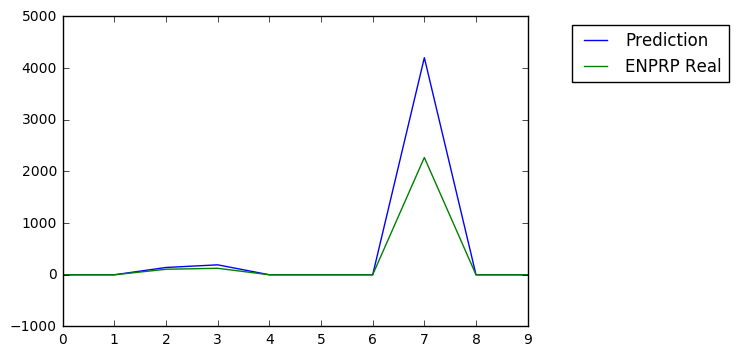

In [4]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

plt.plot(regr.predict(test_x))
plt.plot(test_y)
plt.legend(['Prediction', 'ENPRP Real'], bbox_to_anchor=(1.45, 1))
plt.show()

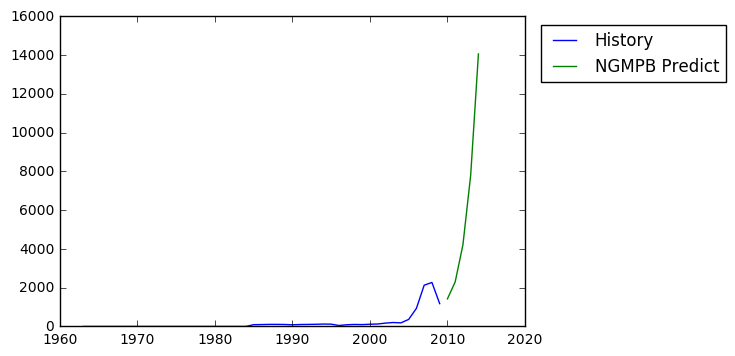

In [5]:
future_x = np.copy(data['ENPRP'][-k:].values.reshape(1, -1))
pred_y = np.zeros((5, 1))
for i in range(5):
    future_y = regr.predict(future_x)
    future_x[:, 0:2] = future_x[:, 1:3]
    future_x[:, 2] = future_y
    pred_y[i, :] = future_y[0, 0]


plt.figure()
plt.plot(np.arange(1960 + k, 2010), all_y)
plt.plot(np.arange(2010, 2015), pred_y)
plt.legend(['History', 'NGMPB Predict'], bbox_to_anchor=(1.45, 1))
plt.show()

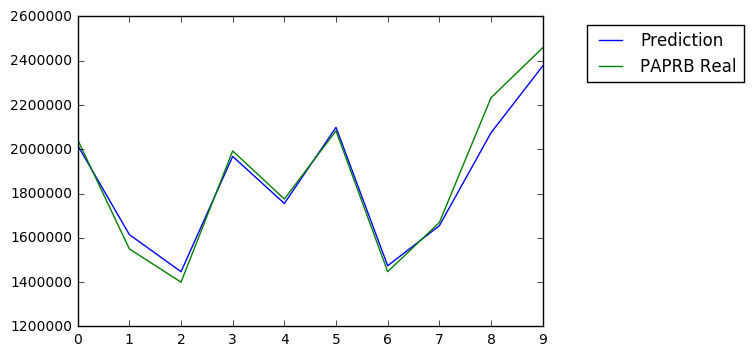

In [6]:
# model test for PAPRB
all_x = np.zeros((50 - k, 3))
all_y = np.zeros((50 - k, 1))

for i in range(0, 50 - k):
    all_x[i, :] = data['PAPRB'][i:i+k].T
    all_y[i, :] = data['PAPRB'][i+k]
    
train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=0.2)

regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

plt.plot(regr.predict(test_x))
plt.plot(test_y)
plt.legend(['Prediction', 'PAPRB Real'], bbox_to_anchor=(1.45, 1))
plt.show()

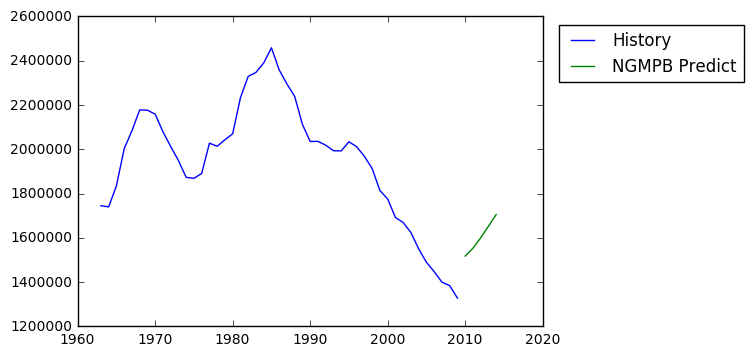

In [7]:
# predict for PAPRB
future_x = np.copy(data['PAPRB'][-k:].values.reshape(1, -1))
pred_y = np.zeros((5, 1))
for i in range(5):
    future_y = regr.predict(future_x)
    future_x[:, 0:2] = future_x[:, 1:3]
    future_x[:, 2] = future_y
    pred_y[i, :] = future_y[0, 0]


plt.figure()
plt.plot(np.arange(1960 + k, 2010), all_y)
plt.plot(np.arange(2010, 2015), pred_y)
plt.legend(['History', 'NGMPB Predict'], bbox_to_anchor=(1.45, 1))
plt.show()

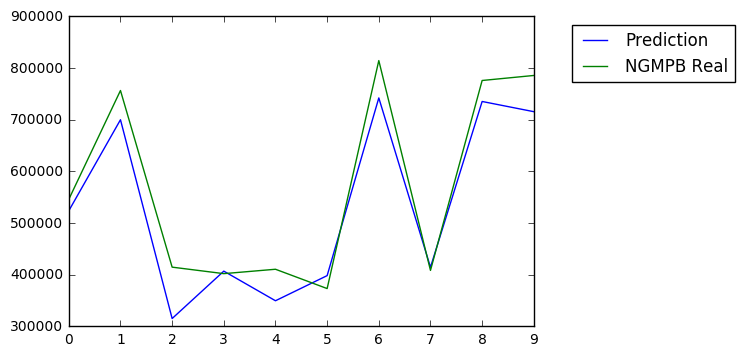

In [8]:
# model test for NGMPB
all_x = np.zeros((50 - k, 3))
all_y = np.zeros((50 - k, 1))

for i in range(0, 50 - k):
    all_x[i, :] = data['NGMPB'][i:i+k].T
    all_y[i, :] = data['NGMPB'][i+k]
    
train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=0.2)

regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

plt.plot(regr.predict(test_x))
plt.plot(test_y)
plt.legend(['Prediction', 'NGMPB Real'], bbox_to_anchor=(1.45, 1))
plt.show()

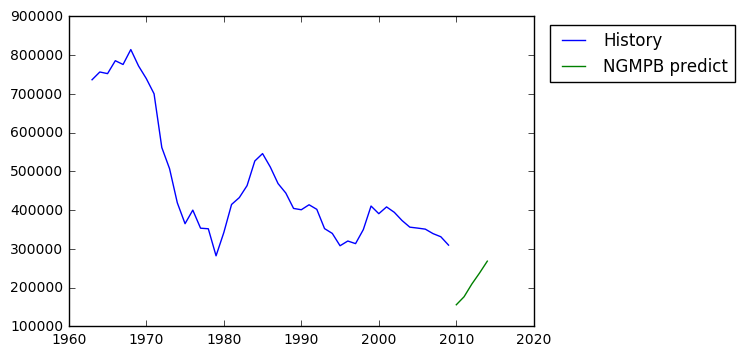

In [9]:
# predict for NGMPB
future_x = np.copy(data['NGMPB'][-k:].values.reshape(1, -1))
pred_y = np.zeros((5, 1))
for i in range(5):
    future_y = regr.predict(future_x)
    future_x[:, 0:2] = future_x[:, 1:3]
    future_x[:, 2] = future_y
    pred_y[i, :] = future_y[0, 0]


plt.figure()
plt.plot(np.arange(1960 + k, 2010), all_y)
plt.plot(np.arange(2010, 2015), pred_y)
plt.legend(['History', 'NGMPB predict'], bbox_to_anchor=(1.45, 1))
plt.show()

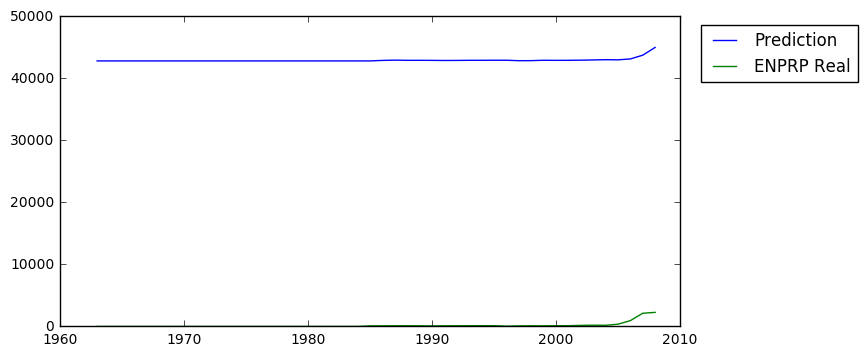

In [10]:
  
    #xtrain = data['ENPRP'][i:i+k]
    #ytrain = data['ENPRP'][i+k]
    #train_x.append(xtrain)
    #train_y.append(ytrain)
#print(train_x)    


"""test_x = []
real_y = data['ENPRP'][42:49]
year_1 = data[['Year'][-7:]]

for i in range(40, 49-k):
    xtest = data['ENPRP'][i:i+k]
    test_x.append([xtest])
#print(train_x)    


test_y = regr.predict(test_x)"""

""""# plot prediction for last 10 yrs with test_x
fig = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(year_1, test_y)
# plot real data
plt.plot(year_1, real_y)
plt.legend(['Prediction', 'ENPRP Real'], bbox_to_anchor=(1.6, 1))
plt.show()"""

# all year span comparison
year_2 = data['Year'][k:49]
allreal_y = data['ENPRP'][k:49]
alltest_x = []
for i in range(49-k):
    xtest = data['ENPRP'][i:i+k]
    alltest_x.append(xtest)
alltest_y = regr.predict(alltest_x)
#print(alltest_x)
fig = plt.figure(figsize=(8,4))
plt.plot(year_2, alltest_y)
# plot real data
plt.plot(year_2, allreal_y)
plt.legend(['Prediction', 'ENPRP Real'], bbox_to_anchor=(1.3, 1))
plt.show()

In [11]:
k = 3
test_y = data['ENPRP'][-k:].values.reshape(-1, 1)
test_x = 
print(test_y)

SyntaxError: invalid syntax (<ipython-input-11-ca7e80b82041>, line 3)

In [12]:
# add the last k data for predicting the 1st
future_y =data['ENPRP']
#print(future_y)
res = regr.predict(future_y[-k:])
res = pd.DataFrame(res)

future_y.append(res)

#future_y = pd.concat([future_y, res], ignore_index=True, names=None)
#print(future_y)
#res = regr.predict(f2)
#res = pd.DataFrame(res)
#future_y = pd.concat([future_y, res], ignore_index=True)
#print(future_y)
"""for i in range(5):
    res = regr.predict(data['ENPRP'][-k:])
    
    res = pd.DataFrame(res)
    data['ENPRP'] = pd.concat([data['ENPRP'], res], ignore_index=True)"""

#print(data['ENPRP'])    

/Users/Hanyang/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


"for i in range(5):\n    res = regr.predict(data['ENPRP'][-k:])\n    \n    res = pd.DataFrame(res)\n    data['ENPRP'] = pd.concat([data['ENPRP'], res], ignore_index=True)"

In [13]:
# Linear regression on 6 other factors
# let other 6 features be predictors X, hydro be Y
# use all but last 10 to train, the last ten for validation
train_x = data[['GDP','CLPRB','EMFDB','ENPRP','PAPRB','NGMPB']][:-10]
train_y = data['HYTCP'][:-10]
# let last ten be test data
#test_x = data[['HYTCP'[-10:], 'WYTCP'[-10:], 'NUETP'[-10:]]]
test_x = data[['GDP','CLPRB','EMFDB','ENPRP','PAPRB','NGMPB']][-10:]
test_y = data['HYTCP'][-10:]
#print(test_x.shape)
# do regular multiple linear regression on train data
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

# plot prediction for last 10 yrs with test_x
fig = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(data[['Year']][-10:], regr.predict(data[['GDP','CLPRB','EMFDB','ENPRP','PAPRB','NGMPB']][-10:]), linewidth = 1)
# plot real data
plt.plot(year1, test_y)
# legend
plt.legend(['Prediction Hydro', 'Real Hydro'], bbox_to_anchor=(0.8, 1.3))

# Plot for MSE
err = 0
err_list = []
for i in range(1, 51):
    pred_y = regr.predict(data[['GDP','CLPRB','EMFDB','ENPRP','PAPRB','NGMPB']][-10:])
    mse_test = np.sum((pred_y - test_y)**2)
    err += mse_test
    #avg = err / i
    err_list.append(err)
year_list = np.linspace(1, 50, 50)  
plt.subplot(122)
plt.plot(year_list, err_list)
plt.xlabel('Number of test')
plt.ylabel('Sum of MSE')

plt.show()

ValueError: x and y must have same first dimension

In [2]:
# Ridge regression
# let other 6 features be predictors X, hydro be Y
# use all but last 10 to train, the last ten for validation
train_x = data[['GDP','CLPRB','EMFDB','ENPRP','PAPRB','NGMPB']][:-10]
train_y = data['HYTCP'][:-10]
# let last ten be test data
#test_x = data[['HYTCP'[-10:], 'WYTCP'[-10:], 'NUETP'[-10:]]]
test_x = data[['GDP','CLPRB','EMFDB','ENPRP','PAPRB','NGMPB']][-10:]
test_y = data['HYTCP'][-10:]
#print(test_x.shape)
# do regular multiple linear regression on train data
regr2 = linear_model.Ridge(alpha = 0.75)
regr2.fit(train_x, train_y)

# plot prediction for last 10 yrs with test_x
fig = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(data[['Year']][-10:], regr2.predict(data[['GDP','CLPRB','EMFDB','ENPRP','PAPRB','NGMPB']][-10:]), linewidth = 1)
# plot real data
plt.plot(year1, test_y)
# legend
plt.legend(['Prediction Hydro', 'Real Hydro'], bbox_to_anchor=(0.8, 1.25))

# Plot for MSE
err = 0
err_list = []
for i in range(1, 51):
    pred_y = regr2.predict(data[['GDP','CLPRB','EMFDB','ENPRP','PAPRB','NGMPB']][-10:])
    err_test = np.sum((pred_y - test_y)**2)
    err += err_test
    #avg = err / i
    err_list.append(err)
year_list = np.linspace(1, 50, 50)  
plt.subplot(122)
plt.plot(year_list, err_list)
plt.xlabel('Number of test')
plt.ylabel('Sum of MSE')

plt.show()

NameError: name 'data' is not defined

In [ ]:
year1 = data[['Year']][-10:]
#print(year1)
year2 = data[['Year']][:-10]
# Use previous year data of own type to predict future data: Hydro data
hydro_train = data[['HYTCP']][:-10]
hydro_test = data[['HYTCP']][-10:]
# do regular multiple linear regression on train data
regr = linear_model.LinearRegression()
regr.fit(year2, hydro_train)

# plot prediction for last 10 yrs hydro
fig = plt.figure()
plt.plot(year1, regr.predict(data[['Year']][-10:]), linewidth = 1)
# plot real data
plt.plot(year1, hydro_test)
# legend
plt.legend(['hydro Prediction', 'hydro Real'], bbox_to_anchor=(1.4, 1))
plt.show()

In [ ]:
# SVM
from sklearn import svm
clf = svm.SVC(gamma=10, C=1e3)
clf.fit(year2, hydro_train)

#plot
# plot prediction for last 10 yrs hydro
fig = plt.figure()
plt.plot(year1, clf.predict(data[['Year']][-10:]), linewidth = 1)
# plot real data
plt.plot(year1, hydro_test)
# legend
plt.legend(['hydro Prediction', 'hydro Real'], bbox_to_anchor=(1.5, 1))
plt.show()

In [ ]:
# Ridge on self predict

rdg = linear_model.Ridge(alpha = 1e10)
rdg.fit(year2, hydro_train)

#plot
# plot prediction for last 10 yrs hydro
fig = plt.figure()
plt.plot(year1, rdg.predict(data[['Year']][-10:]), linewidth = 1)
# plot real data
plt.plot(year1, hydro_test)
# legend
plt.legend(['hydro Prediction', 'hydro Real'], bbox_to_anchor=(1.5, 1))
plt.show()

In [ ]:
# Ridge Regression
# let hydro, wind, nuclear be predictors X, solar be Y

regr2 = linear_model.Ridge(alpha = 0.1)
regr2.fit(train_x, train_y)

# plot prediction
fig = plt.figure()
plt.plot(data[['Year']][-10:], regr2.predict(data[['HYTCP', 'WYTCP', 'NUETP']][-10:]), linewidth = 1)
# plot real data
plt.plot(year1, test_y)
plt.show()

In [ ]:
# Lasso Regression
# let hydro, wind, nuclear be predictors X, solar be Y

regr3 = linear_model.Lasso()
regr3.fit(data[['HYTCP', 'WYTCP', 'NUETP']], solar)
# plot
testx = data[['HYTCP'[-10:], 'WYTCP'[-10:], 'NUETP'[-10:]]]
fig = plt.figure()
plt.plot(testx, regr3.predict(testx), linewidth = 1)
plt.show()
